In [32]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil
import plotting as putil
import google_drive as gdrive

from matplotlib.gridspec import GridSpec

import matplotlib.gridspec as gridspec
import stats as st

import trajectory as traj
import _pickle as pkl

In [41]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
rootdir = util.get_rootdir()
rootdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'

In [28]:
rootdir = util.get_rootdir()
experiment = '45-degree'

if experiment=='45-degree':
    exp_folder = '45 degree plume'
else:
    exp_folder = experiment
srcdir = os.path.join(rootdir.replace('Data', 'Analysis'), exp_folder)
print(srcdir)
# # src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
# print(src_dir)
# fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
# print(fig_id)
savedir = os.path.join(rootdir, 'jyr', 'plume_geometries', 'data')
print(savedir)
# savedir = savedir.replace(" ", "")
# figdir = os.path.join(savedir, 'figures')
# print("Saving figures to:{}    {}".format('\n', figdir))
# if not os.path.exists(figdir):
#     os.makedirs(figdir)

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Analysis/45 degree plume
/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data


In [70]:
print(experiment)
loginfo_fpath = os.path.join(savedir, 'info.pkl')
#if not os.path.exists(loginfo_fpath):
# get log info
logdf = gdrive.get_info_from_gsheet(experiment)
logdir = os.path.join(srcdir, 'logs')
# add filepaths
for fn in logdf['log']:
    fpath = os.path.join(logdir, fn)
    logdf.loc[logdf['log']==fn, 'filepath'] = fpath
    assert os.path.exists(fpath), 'File not found: {}'.format(fn)
# save
print("Saving log info: {}".format(loginfo_fpath))
with open(loginfo_fpath, 'wb') as f:
    pkl.dump(logdf, f)
print(logdf.shape)

45-degree
COMPLETE: Data copied
Saving log info: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data/info.pkl
(26, 7)


In [39]:
logdf['filepath'].iloc[0]

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Analysis/45 degree plume/logs/08252020-012321_45degOdorRight_Reinforced.log'

## check LEDs

In [43]:
%matplotlib notebook

In [58]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

Correcting experiment conditions: 45-degree
Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'ft_posx', 'ft_posy',
       'ft_heading', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'instrip'],
      dtype='object')


<IPython.core.display.Javascript object>


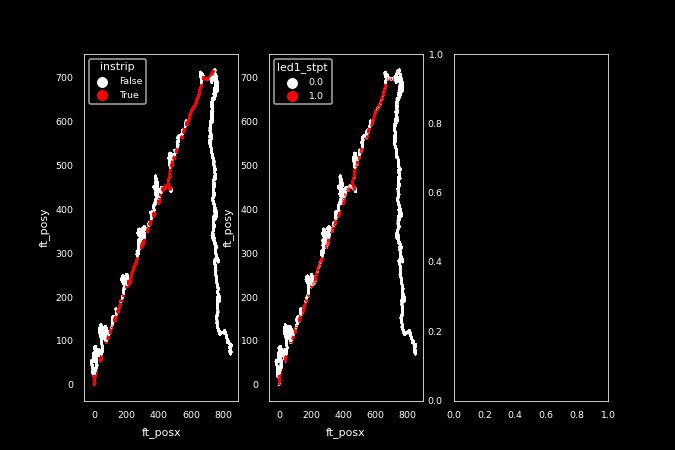

<IPython.core.display.Javascript object>


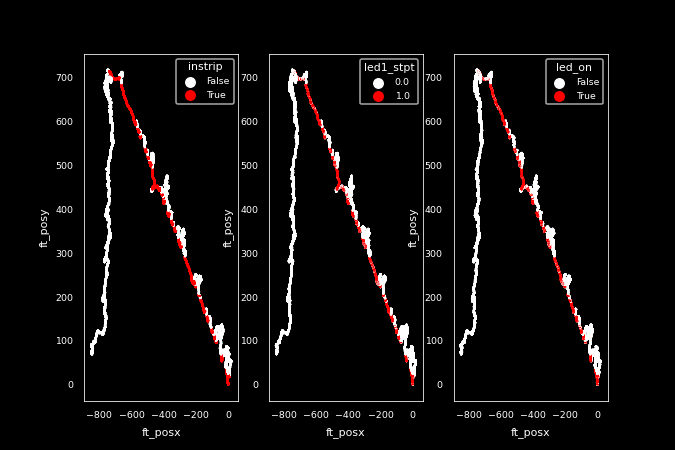

In [59]:
check_leds = True
if check_leds:
    fpath = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Analysis/45 degree plume/logs/08252020-012321_45degOdorRight_Reinforced.log'
    # load raw
    df0 = pd.read_csv(fpath, encoding='latin' )
    if 'instrip' not in df0.columns:
        mfc_params = butil.get_mfc_params(df0)
        df0['instrip'] = df0[mfc_params['odor_mfc']]>0
    # get processed 
    df_ = butil.load_dataframe(fpath, experiment=experiment)
    df_ = butil.correct_manual_conditions(df_, experiment, logdf=logdf)
    df_ = butil.process_df(df_, verbose=False)
    print(df0.columns)

    fig, axn = pl.subplots(1,3)
    sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
    sns.scatterplot(data=df0, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')

    fig, axn = pl.subplots(1,3)
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='instrip', ax=axn[0],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='led1_stpt', ax=axn[1],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')
    sns.scatterplot(data=df_, x='ft_posx', y='ft_posy', hue='led_on', ax=axn[2],
                    palette={True: 'r', False: 'w'}, s=2, edgecolor='none')

# get combined df

In [74]:
create_new=True
strip_width=50
strip_sep=1000
# ---------------------------------
# log_files = butil.get_log_files(src_dir=srcdir, experiment=experiment, verbose=False, is_gdrive=False,
#                         return_loginfo=False)
# is_csv = False
df_fpath = os.path.join(savedir, '{}.pkl'.format(experiment))
if not create_new:
    df0_all = butil.load_df(df_fpath)
else:
    df0_all = butil.load_combined_df(log_files=logdf['filepath'].values, logdf=logdf, src_dir=srcdir,
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=False, create_new=create_new,
                                parse_filename=True, remove_invalid=True, process=True)

Processing 26 tracking files.
Creating combined df
[WARNING] ['08192020-193729_45degRight']: Found bad skips, removing 1450 of 39909 samples.
[WARNING] ['08202020-162923_45degOdor']: Found bad skips, removing 642 of 69003 samples.
[WARNING] ['08212020-154803_45degOdorRight(lossed tracking)']: Found bad skips, removing 248 of 86159 samples.
Correcting experiment conditions: 45-degree
Saving combined df to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data


In [76]:
print("There are {} unique fly IDs.".format(len(df0_all['fly_id'].unique())))
df0_all['fly_id'].unique()

There are 26 unique fly IDs.


array(['20200814-fly1', '20200814-fly15', '20200816-fly2',
       '20200816-fly3', '20200816-fly4', '20200816-fly16',
       '20200819-fly5', '20200819-fly17', '20200819-fly6',
       '20200819-fly18', '20200820-fly7', '20200820-fly19',
       '20200821-fly8', '20200821-fly20', '20200821-fly9',
       '20200821-fly21', '20200821-fly10', '20200821-fly22',
       '20200824-fly11', '20200824-fly23', '20200824-fly12',
       '20200824-fly24', '20200824-fly13', '20200824-fly25',
       '20200825-fly14', '20200825-fly26'], dtype=object)

In [75]:
condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

Found 9 conditions:
45degodorright
45degodorrightreinforced
45degodorright(lossed tracking)
45degodorright_reinforced
45degright
45degrightreinforcement
45degodor
45degodorreinforced
45degodor_reinforced


In [81]:
reinforced = [c for c in condition_list if 'reinforced' in c or 'reinforcement' in c]
not_reinforced = [c for c in condition_list if c not in reinforced]
df0_all.loc[df0_all['condition'].isin(reinforced), 'condition'] = 'reinforced'
df0_all.loc[df0_all['condition'].isin(not_reinforced), 'condition'] = 'not_reinforced'


In [85]:
if create_new: # save
    print("Saving combined df to: {}".format(df_fpath))
    butil.save_df(df0_all, df_fpath)
create_new=False

Saving combined df to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/plume_geometries/data
